In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

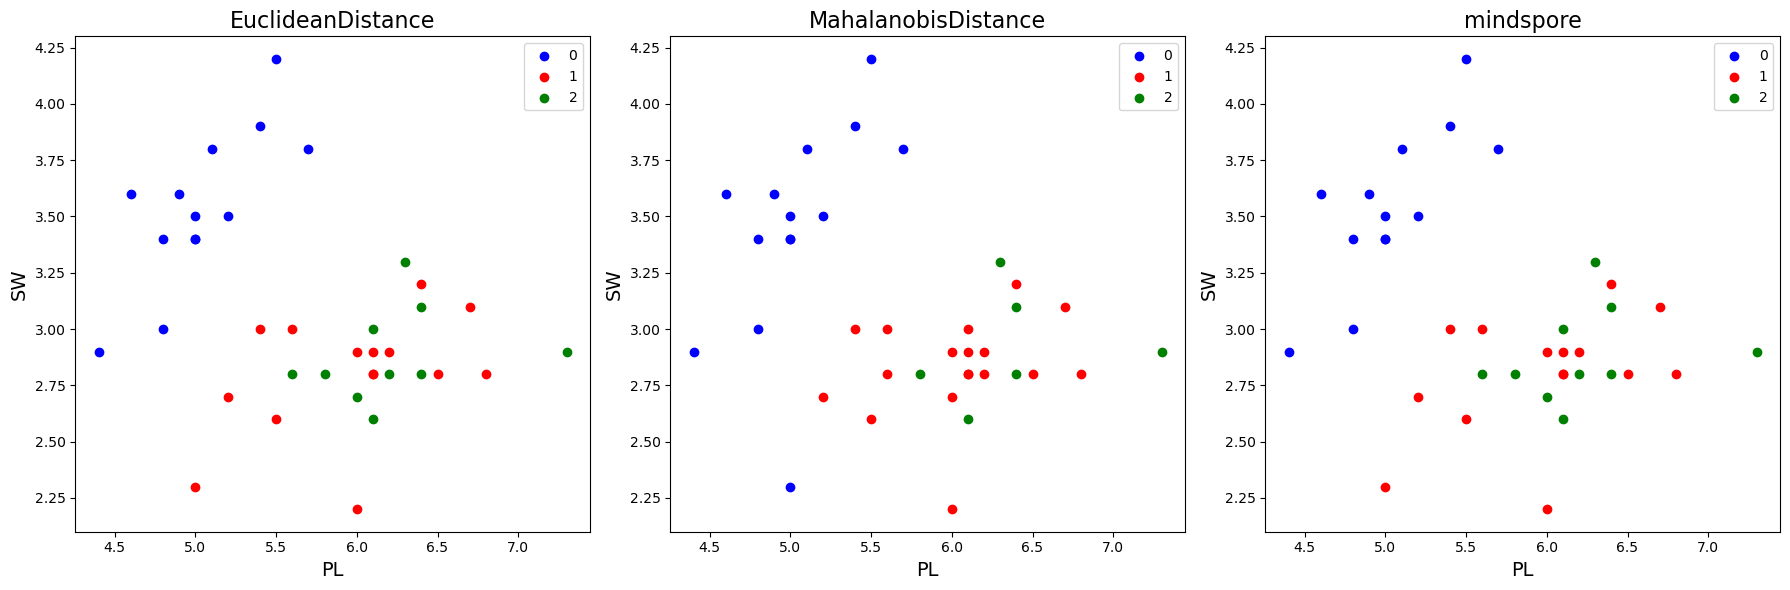

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 可视化第一个文件
test_data1 = pd.read_csv('mypredicsion_csv/for visual/task1_test_Euclidean1.csv', header=0)
test_data1 = np.array(test_data1)
data_label1_0 = test_data1[test_data1[:, -1] == 0, :]
data_label1_1 = test_data1[test_data1[:, -1] == 1, :]
data_label1_2 = test_data1[test_data1[:, -1] == 2, :]

axes[0].scatter(data_label1_0[:, 0], data_label1_0[:, 1], c='b', label='0')
axes[0].scatter(data_label1_1[:, 0], data_label1_1[:, 1], c='r', label='1')
axes[0].scatter(data_label1_2[:, 0], data_label1_2[:, 1], c='g', label='2')
axes[0].set_xlabel('PL', fontsize=14)
axes[0].set_ylabel('SW', fontsize=14)
axes[0].set_title('EuclideanDistance', fontsize=16)
axes[0].legend()

# 可视化第二个文件
test_data2 = pd.read_csv('mypredicsion_csv/for visual/task2_test_prediction.csv', header=0)
test_data2 = np.array(test_data2)
data_label2_0 = test_data2[test_data2[:, -1] == 0, :]
data_label2_1 = test_data2[test_data2[:, -1] == 1, :]
data_label2_2 = test_data2[test_data2[:, -1] == 2, :]

axes[1].scatter(data_label2_0[:, 0], data_label2_0[:, 1], c='b', label='0')
axes[1].scatter(data_label2_1[:, 0], data_label2_1[:, 1], c='r', label='1')
axes[1].scatter(data_label2_2[:, 0], data_label2_2[:, 1], c='g', label='2')
axes[1].set_xlabel('PL', fontsize=14)
axes[1].set_ylabel('SW', fontsize=14)
axes[1].set_title('MahalanobisDistance', fontsize=16)
axes[1].legend()

# 可视化第三个文件
test_data3 = pd.read_csv('mypredicsion_csv/for visual/task3_test_prediction.csv', header=0)
test_data3 = np.array(test_data3)
data_label3_0 = test_data3[test_data3[:, -1] == 0, :]
data_label3_1 = test_data3[test_data3[:, -1] == 1, :]
data_label3_2 = test_data3[test_data3[:, -1] == 2, :]

axes[2].scatter(data_label3_0[:, 0], data_label3_0[:, 1], c='b', label='0')
axes[2].scatter(data_label3_1[:, 0], data_label3_1[:, 1], c='r', label='1')
axes[2].scatter(data_label3_2[:, 0], data_label3_2[:, 1], c='g', label='2')
axes[2].set_xlabel('PL', fontsize=14)
axes[2].set_ylabel('SW', fontsize=14)
axes[2].set_title('mindspore', fontsize=16)
axes[2].legend()

plt.tight_layout()  # 调整子图的间距
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Matrix W:
 [[ 0.29983199 -0.77942202]
 [-0.14970035 -0.60258966]
 [ 0.87377083  0.11179886]
 [ 0.35244165  0.12995396]]


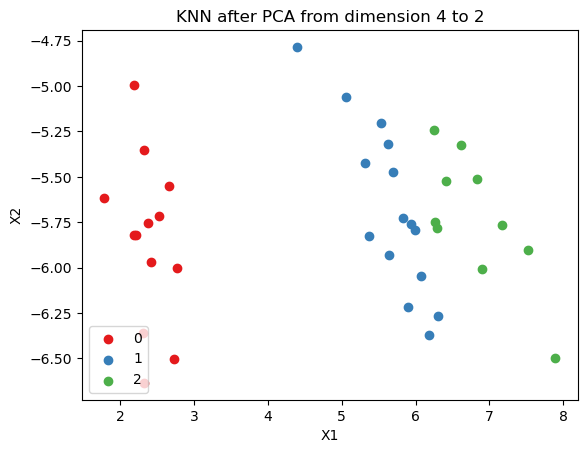

In [19]:
#通过PCA降至二维以实现可视化
X = test_data1[:,:-1]
cov_mat = np.cov(X.T)  # 计算协方差矩阵
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)  # 计算特征值与特征向量

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)  # 未在参数中提供轴，则将数组展平，并为结果数组计算累计和即为累计方差



eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)  # 按特征值降序排列特征对

#选取两个对应特征值最大的特征向量

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))  # 得到11*2维的映射矩阵W
print('Matrix W:\n', w)
X_train_pca = X.dot(w)  # 将训练集数据转换到包含两个主成分的空间上

#压缩到二维的数据进行可视化展示

X_train_pca = np.array(X_train_pca)
y = np.array(test_data1[:,-1], dtype=int)

colors = plt.cm.Set1(np.unique(y+1) / 10.)
# markers = ['s', 'x']
for l, c in zip(np.unique(y), colors):
    plt.scatter(X_train_pca[y == l, 0], X_train_pca[y == l, 1], c=c, label=l)

# plt.scatter(data_label_0[:,0], data_label_0[:,1], c='b', marker='o', label='0')
# plt.scatter(data_label_1[:,0], data_label_1[:,1], c='r', marker='^', label='1')
# plt.scatter(data_label_2[:,0], data_label_2[:,1], marker='s', label='2')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KNN after PCA from dimension 4 to 2')
plt.legend(loc='lower left')
plt.show()

